# Unsupervised Learning for Understanding Customer Behavior

### Abstract:
In this notebook, we apply unsupervised learning techniques to explore and understand the behavior of customers in a marketing dataset. By performing clustering using K-Means, we analyze different customer segments based on various features such as contact methods, campaign engagement, previous outcomes, and financial information. The goal is to uncover hidden patterns and trends that can guide targeted marketing strategies and improve customer engagement. Through this analysis, we identify key differences between customer clusters and provide actionable insights to optimize marketing campaigns. The unsupervised learning approach allows us to gain a deeper understanding of customer behaviors without the need for predefined labels or outcomes.


## 1. Dataset Overview

This analysis is based on the **Bank Marketing Dataset**, which contains detailed information about customer profiles and their interaction history with previous marketing campaigns. The primary goal is to develop a predictive model that can assess whether a customer is likely to subscribe to a financial product, thereby helping banks increase marketing efficiency and conversion rates.

### Dataset Composition:
- **Total Features**: 17
- **Target Variable**: 1 (binary: 0 = no subscription, 1 = subscription)
- **Missing Values**: None

### Feature Categories:
- **Numerical Columns (7)**: 
  - `age`, `balance`, `day`, `duration`, `campaign`, `pdays`, `previous`
- **Categorical Columns (10)**: 
  - `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `poutcome`, and `Target`

### Target Distribution:
The dataset exhibits **significant class imbalance**:
- **83%** of records labeled as **0** (no subscription)
- **17%** of records labeled as **1** (subscription)

This imbalance is addressed using **resampling techniques** and **precision-recall-based evaluation metrics** to prevent model bias toward the majority class.


### Importing Required Libraries

To begin the analysis, we import essential Python libraries for data manipulation, visualization, clustering, and machine learning tasks:

- `pandas` and `numpy` for data handling and numerical operations  
- `matplotlib.pyplot` and `seaborn` for data visualization  
- `KMeans` from `sklearn.cluster` for clustering analysis  
- `StandardScaler` from `sklearn.preprocessing` for feature scaling  
- `silhouette_score` from `sklearn.metrics` for evaluating clustering performance


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

### Data Loading and Preprocessing

The dataset is loaded using `pandas`, and a new binary feature `contacted` is created based on the `pdays` column:

- If `pdays = -1`, the customer was **not contacted previously** → `contacted = 0`
- Otherwise, the customer **was contacted** → `contacted = 1`

The target variable `Target` is separated from the feature set. Categorical variables are then encoded using **one-hot encoding** with `drop_first=True` to avoid multicollinearity.

Finally, all features are scaled using `StandardScaler` to standardize numerical values and prepare the data for machine learning algorithms that are sensitive to feature scales.


In [2]:
df = pd.read_csv('train.csv')
df["contacted"] = df["pdays"].apply(lambda x: "0" if x == -1 else "1")


X = df.drop(columns=['Target'])
y = df['Target']

# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)



In [3]:
X_encoded

,id,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,contacted_1
0,21740,30,4,7,172,8,-1,0,False,False,...,False,False,True,False,False,False,False,False,True,False
1,22648,32,116,20,718,2,-1,0,False,False,...,False,False,False,False,False,False,False,False,True,False
2,31793,56,82,16,215,1,-1,0,False,False,...,False,False,True,False,False,False,False,False,True,False
3,21439,25,333,15,1056,2,-1,0,False,False,...,False,False,False,False,False,False,False,False,True,False
4,70323,38,393,18,90,3,-1,0,False,False,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,4870,22,283,22,254,2,-1,0,False,False,...,False,True,False,False,False,False,False,False,True,False
31643,55890,43,0,30,266,6,-1,0,False,False,...,False,False,False,False,False,False,False,False,True,False
31644,47793,44,561,30,613,2,-1,0,False,False,...,False,False,True,False,False,False,False,False,True,False
31645,88872,33,217,20,198,1,339,3,True,False,...,False,False,False,False,False,False,False,False,False,True


### Determining the Optimal Number of Clusters

To identify the optimal number of clusters for customer segmentation, both the **Elbow Method** and **Silhouette Method** are employed:

- **Within-Cluster Sum of Squares (WCSS)** is calculated for each `k` from 2 to 10 to evaluate the compactness of clusters (used in the Elbow Method).
- **Silhouette Score** is also computed for each value of `k`, measuring how well-separated the clusters are.

This dual evaluation helps in selecting a value of `k` that achieves both compact and well-separated clusters, ensuring meaningful customer segmentation.


In [5]:
# Find the optimal number of clusters using the Elbow and Silhouette methods
wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

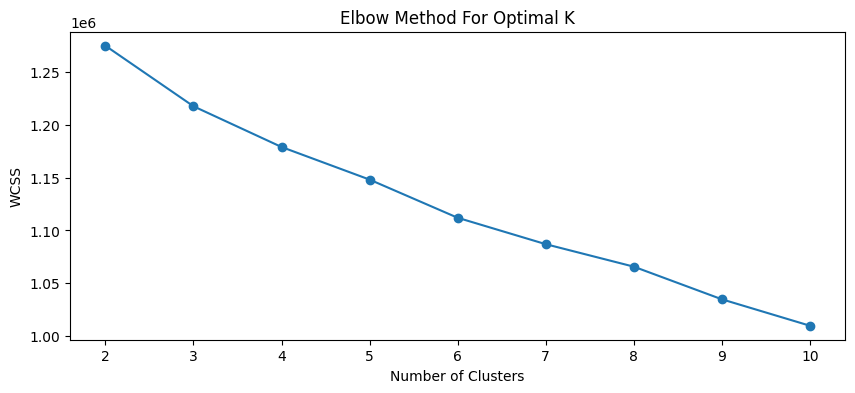

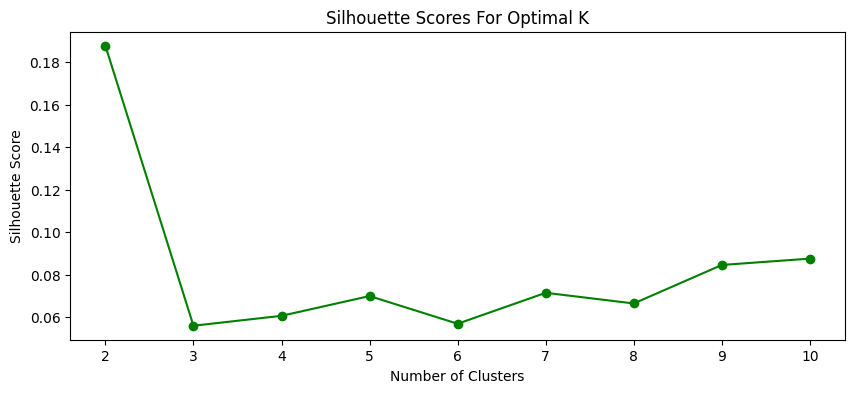

In [6]:
# Plot Elbow Method
plt.figure(figsize=(10, 4))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 4))
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores For Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


### Clustering with Optimal Number of Clusters and Identifying High-Value Segment

Using the optimal number of clusters determined by the **highest Silhouette Score**, KMeans clustering is applied to segment the customers.

Each data point is assigned a cluster label, which is then added as a new column `Cluster` in the original dataframe.

To identify the **high-value customer segment**, the **conversion rate** (mean of the `Target` variable) is calculated for each cluster:

- The cluster with the **highest conversion rate** is labeled as the **High Value Cluster**.
- This group represents customers who are most likely to subscribe to the financial product and are therefore ideal targets for marketing campaigns.

The conversion rates by cluster are printed to provide a clear picture of which clusters are most responsive.


In [7]:
# Apply KMeans with best K (based on Silhouette)
best_k = K_range[silhouette_scores.index(max(silhouette_scores))]
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Identify High Value Cluster (with highest conversion rate)
conversion_rates = df.groupby('Cluster')['Target'].mean()
high_value_cluster = conversion_rates.idxmax()

# Display conversion rates
print("\nConversion Rate by Cluster:")
print(conversion_rates)


Conversion Rate by Cluster:
Cluster
0    0.229616
1    0.093438
Name: Target, dtype: float64


### Segmenting Features for Focused Analysis

To enable targeted analysis and deeper insights, the dataset is divided into thematic subsets based on the nature of the features:

- **Financial Features** (`df_financial`): Contains variables related to the customer’s financial status — `balance`, `default`, `housing`, and `loan`.
- **Marketing Interaction Features** (`df_marketing`): Includes attributes capturing customer interaction history with previous campaigns — such as `contact`, `day`, `month`, `duration`, `campaign`, `pdays`, `previous`, and `poutcome`.
- **Customer Profile Features** (`df_customer`): Demographic and occupational details — `age`, `job`, `marital`, and `education`.
- **Target Variable** (`df_target`): The binary outcome indicating subscription to the financial product.

This segmentation supports focused analysis within each domain and helps identify which feature groups contribute most significantly to subscription behavior.


In [8]:
df_financial = df[["balance", "default", "housing", "loan"]]

df_marketing = df[["contact", "day", "month", "duration", "campaign", "pdays", "previous", "poutcome"]]

df_customer = df[["age", "job", "marital", "education"]]

df_target = df[["Target"]]


### Analyzing Cluster Characteristics

To understand the distinct behaviors and profiles within each cluster, a summary of financial and personal features is generated:

- **Cluster-wise Descriptive Statistics** are computed for financial and personal attributes, providing insights into the typical values and spread of features within each cluster.

- The analysis includes:
  - **Financial Features**: `balance`, `default`, `housing`, `loan`
  - **Personal Features**: `age`, `job`, `marital`, `education`

### Visualizing Feature Distributions

To further explore differences across clusters:
- **Categorical Features** (like `job`, `marital`, etc.) are visualized using **count plots** with clusters as hue.
- **Numerical Features** (like `age`, `balance`, etc.) are visualized using **box plots** grouped by cluster.

These visualizations help uncover meaningful patterns and distinguishable traits among customer segments, which can guide marketing strategies and personalization efforts.



Cluster Characteristics Summary:
Cluster                   0             1
balance count   5801.000000  25846.000000
        mean    1561.362868   1323.093748
        std     3225.727090   3076.540026
        min    -1884.000000  -4057.000000
        25%      175.000000     53.000000
        50%      598.000000    414.000000
        75%     1707.000000   1354.000000
        max    81204.000000  98417.000000
age     count   5801.000000  25846.000000
        mean      41.050509     40.913372
        std       11.444048     10.426088
        min       18.000000     18.000000
        25%       33.000000     33.000000
        50%       38.000000     39.000000
        75%       48.000000     48.750000
        max       93.000000     95.000000


C:\Users\JCIN\AppData\Local\Temp\ipykernel_6844\3761850853.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=feature, palette='coolwarm')


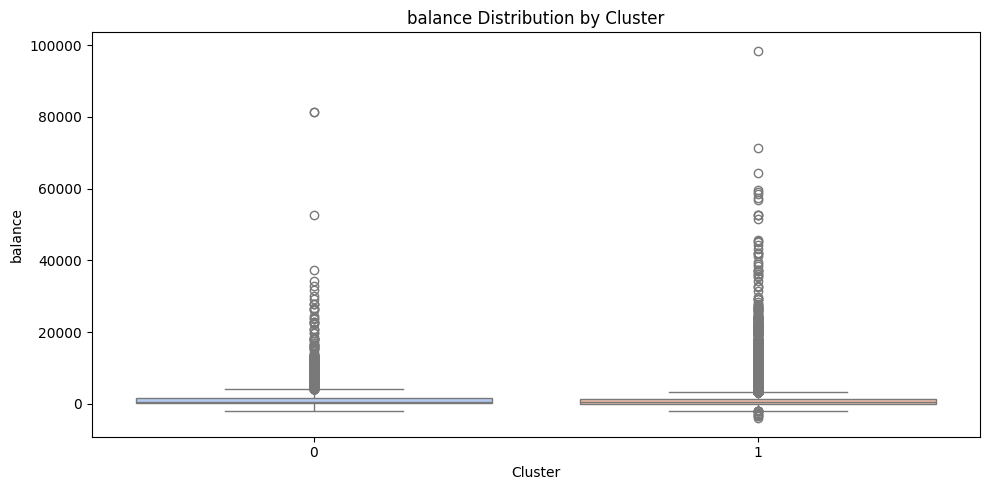

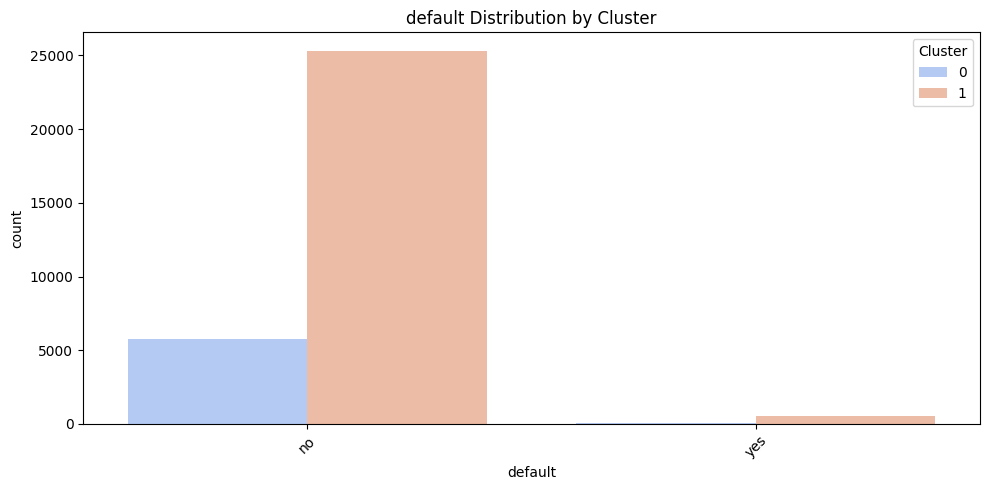

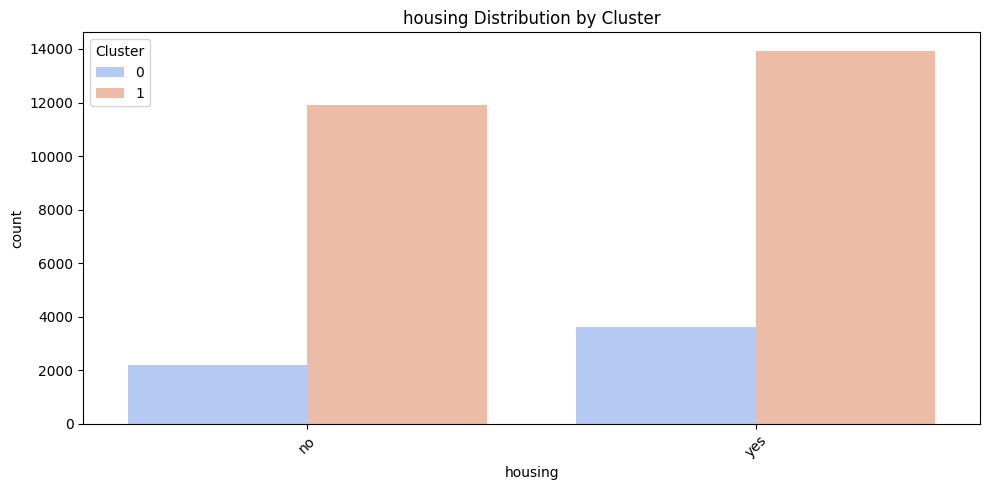

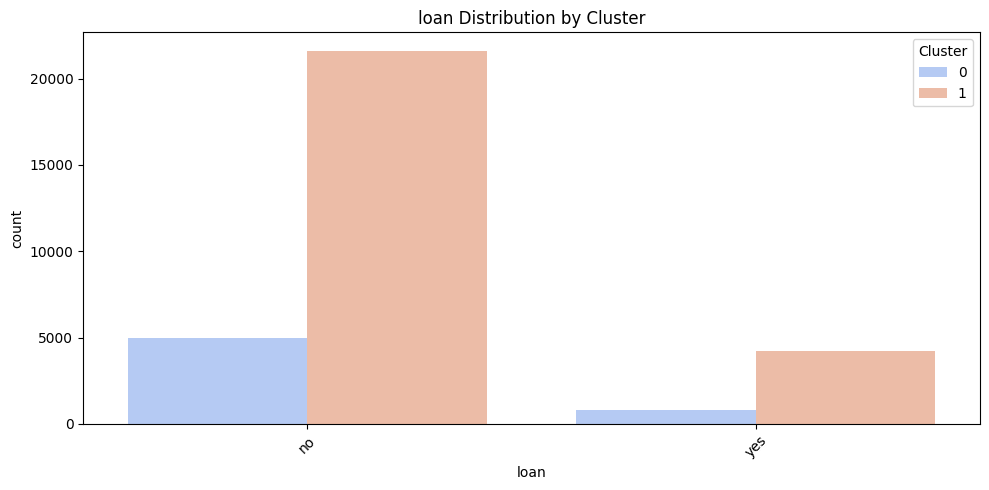

C:\Users\JCIN\AppData\Local\Temp\ipykernel_6844\3761850853.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=feature, palette='coolwarm')


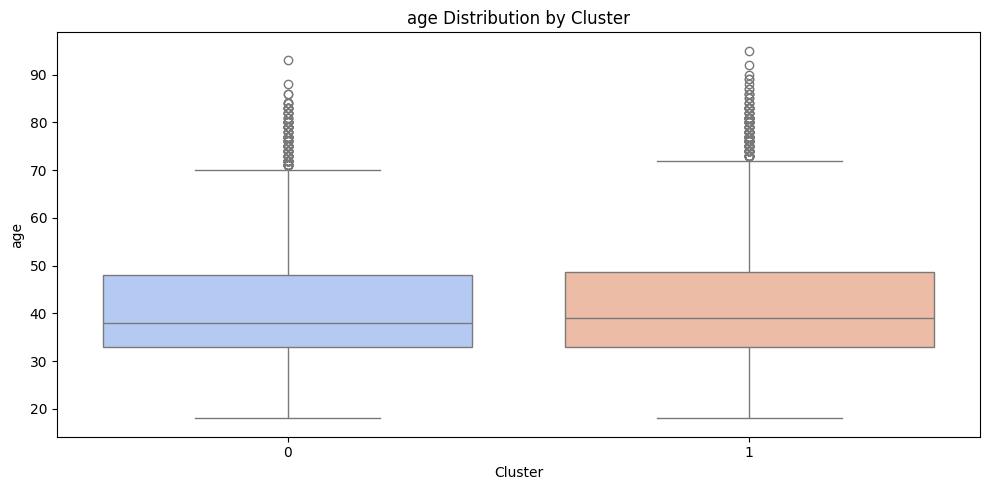

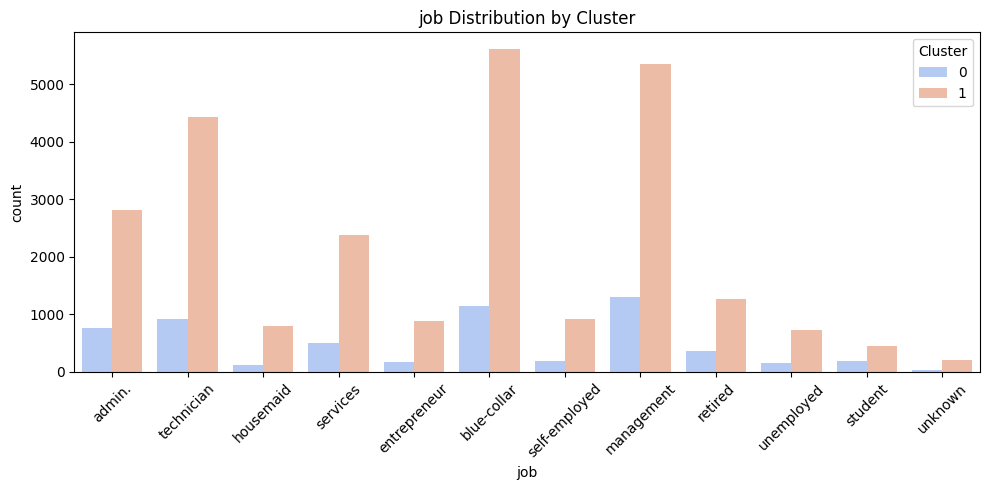

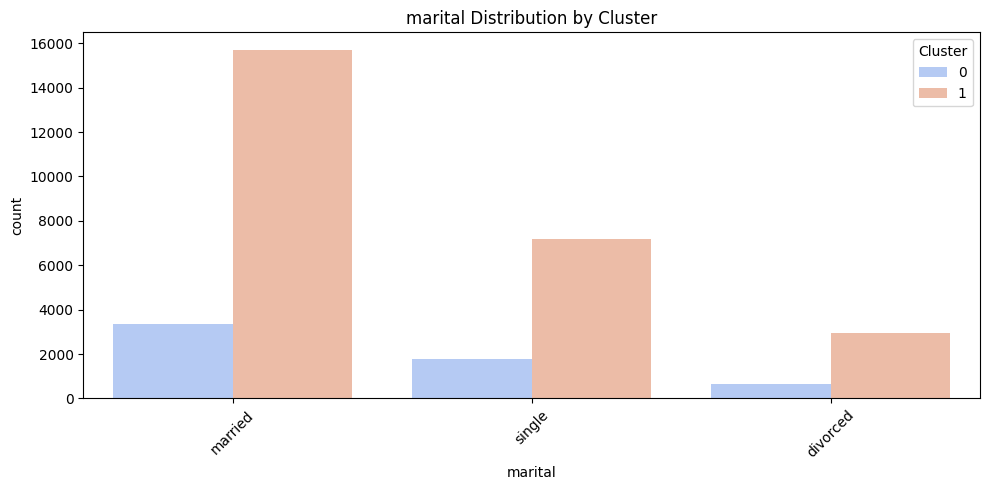

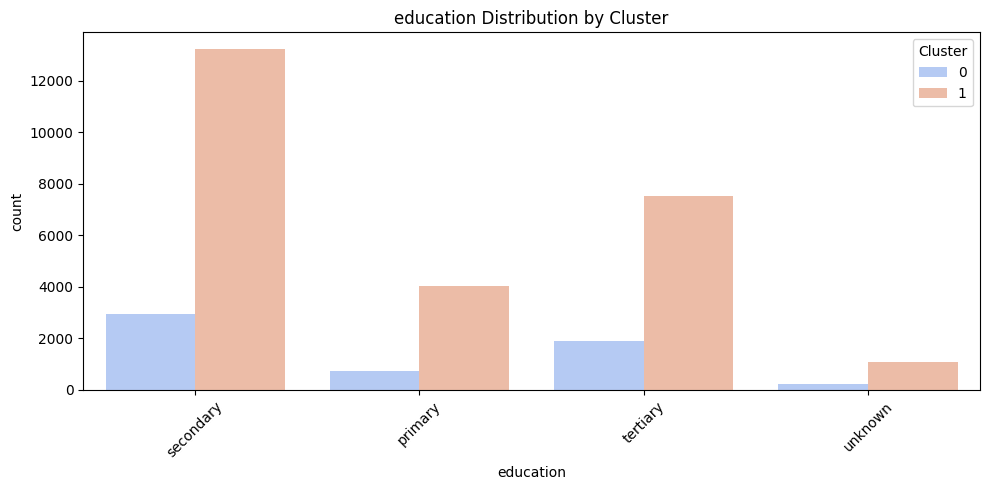

In [9]:
financial_features = ['balance', 'default', 'housing', 'loan']
personal_features = ['age', 'job', 'marital', 'education']

cluster_characteristics = df.groupby('Cluster')[financial_features + personal_features].describe().transpose()
print("\nCluster Characteristics Summary:")
print(cluster_characteristics)

# Visualize feature distributions by cluster
for feature in financial_features + personal_features:
    if df[feature].dtype == 'object':
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=feature, hue='Cluster', palette='coolwarm')
        plt.title(f'{feature} Distribution by Cluster')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df, x='Cluster', y=feature, palette='coolwarm')
        plt.title(f'{feature} Distribution by Cluster')
        plt.tight_layout()
        plt.show()

### In-Depth Cluster-wise Feature Analysis

To uncover actionable insights and better understand customer segments, a three-part analysis is conducted:

#### 1. Numerical Feature Analysis
For key numerical attributes (`balance`, `age`), the **mean**, **median**, and **standard deviation** are calculated for each cluster. This provides a statistical overview of financial status and age distribution across clusters, aiding in identifying trends like older, wealthier customers in specific clusters.

#### 2. Categorical Feature Analysis
A comprehensive summary of **categorical features** (`default`, `housing`, `loan`, `job`, `marital`, `education`) is created:
- **Count** of customers in each category per cluster.
- **Percentage Share** of each category within a cluster.
This dual perspective reveals dominant customer traits and the composition of each segment in terms of risk, occupation, and personal background.

#### 3. Subscription Rate (Target Conversion)
The **conversion rate** — the proportion of customers who subscribed to the product (Target = 1) — is computed per cluster. This helps identify which customer groups are most responsive, reinforcing the definition of the high-value segment.

These insights together form a solid foundation for targeted marketing and strategic decision-making.


In [9]:
financial_features = ['balance', 'default', 'housing', 'loan']
personal_features = ['age', 'job', 'marital', 'education']

numerical_features = ['balance', 'age']
print("\nNumerical Feature Analysis (Mean, Median, Std) by Cluster\n")
for feature in numerical_features:
    stats = df.groupby('Cluster')[feature].agg(['mean', 'median', 'std'])
    print(f"\nFeature: {feature}")
    print(stats)

categorical_features = ['default', 'housing', 'loan', 'job', 'marital', 'education']
print("\nCategorical Feature Analysis (Count & % Share) by Cluster\n")
for feature in categorical_features:
    print(f"\nFeature: {feature}")
    count_df = pd.crosstab(df[feature], df['Cluster'])
    percent_df = count_df.div(count_df.sum(axis=0), axis=1) * 100
    display_df = count_df.astype(str) + " (" + percent_df.round(1).astype(str) + "%)"
    print(display_df)

print("\nSubscription Rate (Target = 1) by Cluster\n")
conversion_rates = df.groupby('Cluster')['Target'].mean().round(3)
print(conversion_rates)




Numerical Feature Analysis (Mean, Median, Std) by Cluster


Feature: balance
                mean  median          std
Cluster                                  
0        1561.362868   598.0  3225.727090
1        1323.093748   414.0  3076.540026

Feature: age
              mean  median        std
Cluster                              
0        41.050509    38.0  11.444048
1        40.913372    39.0  10.426088

Categorical Feature Analysis (Count & % Share) by Cluster


Feature: default
Cluster             0              1
default                             
no       5756 (99.2%)  25302 (97.9%)
yes         45 (0.8%)     544 (2.1%)

Feature: housing
Cluster             0              1
housing                             
no       2186 (37.7%)  11920 (46.1%)
yes      3615 (62.3%)  13926 (53.9%)

Feature: loan
Cluster             0              1
loan                                
no       5000 (86.2%)  21597 (83.6%)
yes       801 (13.8%)   4249 (16.4%)

Feature: job
Cluster            

### Cluster-wise Analysis: Key Insights & Conclusions

#### 1. High-Value Cluster Identification
- **Cluster 0** demonstrates a **significantly higher subscription rate (23.0%)** compared to **Cluster 1 (9.3%)**, identifying it as the **high-value customer segment** for targeted marketing efforts.

#### 2. Financial Behavior
- Customers in **Cluster 0** tend to have **higher average balances (₹1561)** than Cluster 1 (₹1323).
- Standard deviation in balance is high in both clusters, suggesting financial diversity within groups.
- **Loan and housing ownership** patterns differ: Cluster 0 has a **higher percentage of customers with housing loans** but **fewer with personal loans**, indicating more long-term financial commitments.

#### 3. Demographic Traits
- **Age distribution** is fairly similar across both clusters, with a slight tendency for Cluster 0 to include older individuals on average.
- **Cluster 0 has a higher share of students, retired individuals, and high-level job roles (e.g., management)**, suggesting a mixed but potentially more financially-aware segment.

#### 4. Personal Attributes
- **Cluster 0 has more customers who are single (30.7%)** than Cluster 1 (27.9%) — a minor but notable difference.
- Educational levels vary slightly: Cluster 0 has **more tertiary-educated individuals (32.5%)**, indicating potential for better financial literacy and product understanding.

#### 5. Risk Indicators
- Default rates are slightly lower in Cluster 0 (0.8%) compared to Cluster 1 (2.1%), indicating a **lower credit risk profile** for the high-value segment.

---

### Final Recommendations
- **Focus marketing efforts on Cluster 0** with personalized campaigns and financial products suited for educated, financially-stable, and housing-loan-holding individuals.
- Consider **differentiated messaging** for Cluster 1 to improve conversion, possibly focusing on financial education and tailored low-risk offerings.


### Numerical Feature Statistics by Cluster & Target
This section provides descriptive statistics (mean, median, and standard deviation) for numerical features (`balance` and `age`) across different clusters and target values (Target = 1 for subscription, Target = 0 for non-subscription). The grouped statistics help identify how these features behave across different clusters and whether subscription (Target = 1) is correlated with particular numerical values.

### Categorical Feature Distribution by Cluster & Target
For each categorical feature (`default`, `housing`, `loan`, `job`, `marital`, `education`), we compute the cross-tabulation of feature values against `Cluster` and `Target`. This reveals the distribution of each feature across clusters, as well as the percentage of customers with and without subscriptions in each cluster.

**Example insights:**
- How many customers in each cluster have a default status or own a house.
- The percentage of customers with a loan, by target value, in each cluster.

### Categorical Feature Visualization
For categorical features with fewer than 20 unique values, we visualize the distribution of these features across the target variable (whether a customer subscribed or not) and clusters. This helps visualize the frequency and distribution of each feature by the target class (subscribed vs. not subscribed).

### Numerical Feature Distribution by Cluster & Target
For numerical features (`balance` and `age`), we create **violin plots** split by `Cluster` and `Target`. Violin plots show the distribution of data across clusters and target values. This is helpful to visually assess how features like `balance` and `age` differ in distribution between clusters, and how these differences relate to subscription behavior.

This analysis provides insights into how different features (both numerical and categorical) influence subscription behavior across clusters.


In [10]:
numerical_features = ['balance', 'age']
numerical_stats = df.groupby(['Cluster', 'Target'])[numerical_features].agg(['mean', 'median', 'std'])
print("📌 Numerical Feature Statistics by Cluster & Target:\n")
print(numerical_stats)

📌 Numerical Feature Statistics by Cluster & Target:

                    balance                            age                  
                       mean median          std       mean median        std
Cluster Target                                                              
0       0       1433.515775  545.0  2729.228001  40.594540   38.0  10.578492
        1       1990.303303  846.0  4483.208672  42.580330   39.0  13.856851
1       0       1285.863215  394.0  3065.293445  40.885408   39.0  10.111874
        1       1684.314700  674.0  3161.559910  41.184679   38.0  13.088249


In [14]:
categorical_features = ['default', 'housing', 'loan', 'job', 'marital', 'education']

for feature in categorical_features:
    print(f"\nFeature: {feature.upper()}")
    cross_tab = pd.crosstab([df['Cluster'], df['Target']], df[feature], margins=False)
    cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
    combined = cross_tab.astype(str) + ' (' + cross_tab_percent.round(1).astype(str) + '%)'
    print(combined)


Feature: DEFAULT
default                    no         yes
Cluster Target                           
0       0        4428 (99.1%)   41 (0.9%)
        1        1328 (99.7%)    4 (0.3%)
1       0       22925 (97.8%)  506 (2.2%)
        1        2377 (98.4%)   38 (1.6%)

Feature: HOUSING
housing                    no            yes
Cluster Target                              
0       0        1309 (29.3%)   3160 (70.7%)
        1         877 (65.8%)    455 (34.2%)
1       0       10406 (44.4%)  13025 (55.6%)
        1        1514 (62.7%)    901 (37.3%)

Feature: LOAN
loan                       no           yes
Cluster Target                             
0       0        3755 (84.0%)   714 (16.0%)
        1        1245 (93.5%)     87 (6.5%)
1       0       19444 (83.0%)  3987 (17.0%)
        1        2153 (89.2%)   262 (10.8%)

Feature: JOB
job                   admin.   blue-collar entrepreneur   housemaid  \
Cluster Target                                                        
0      

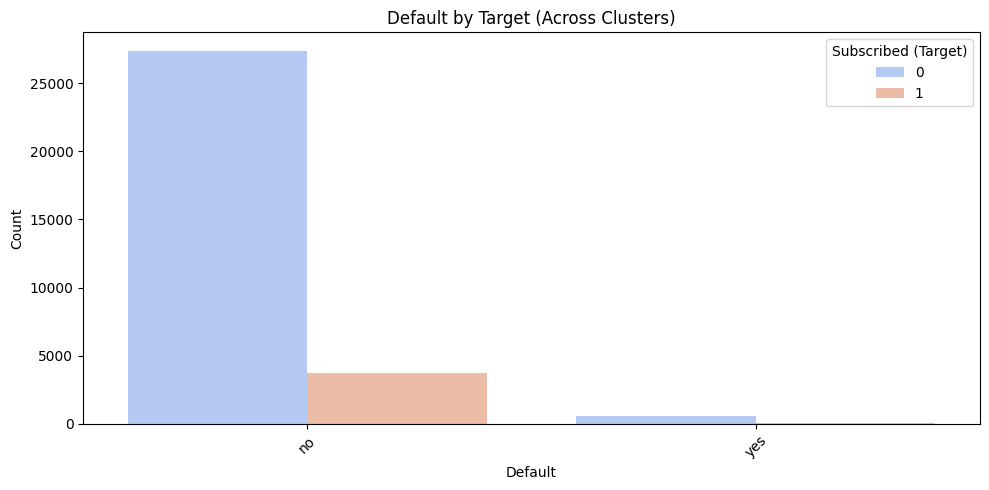

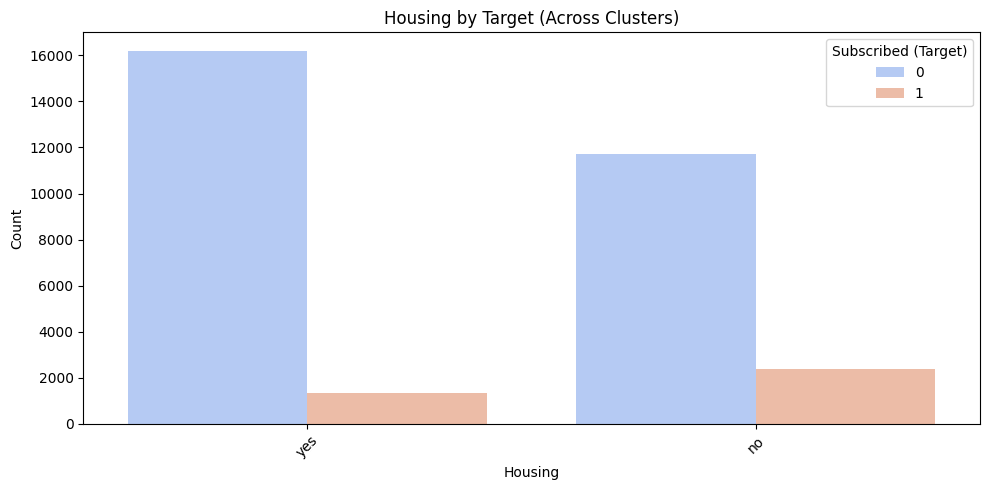

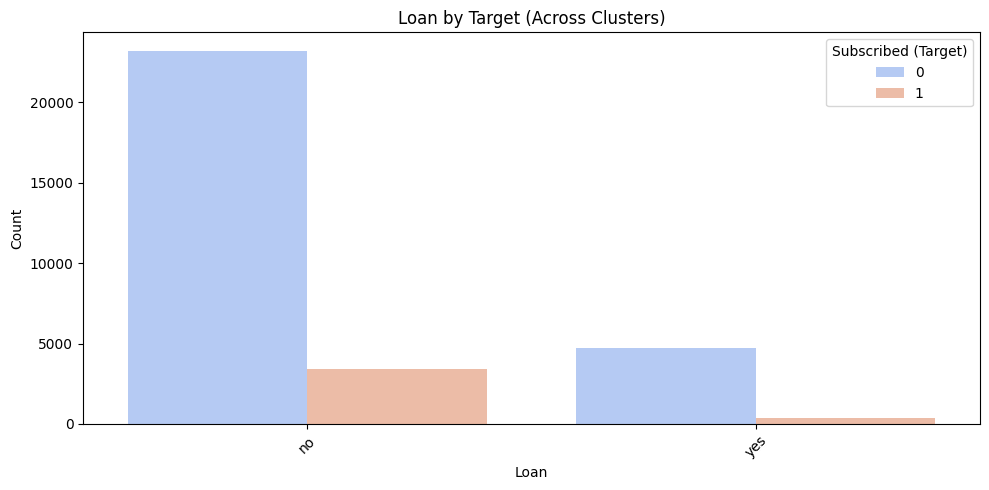

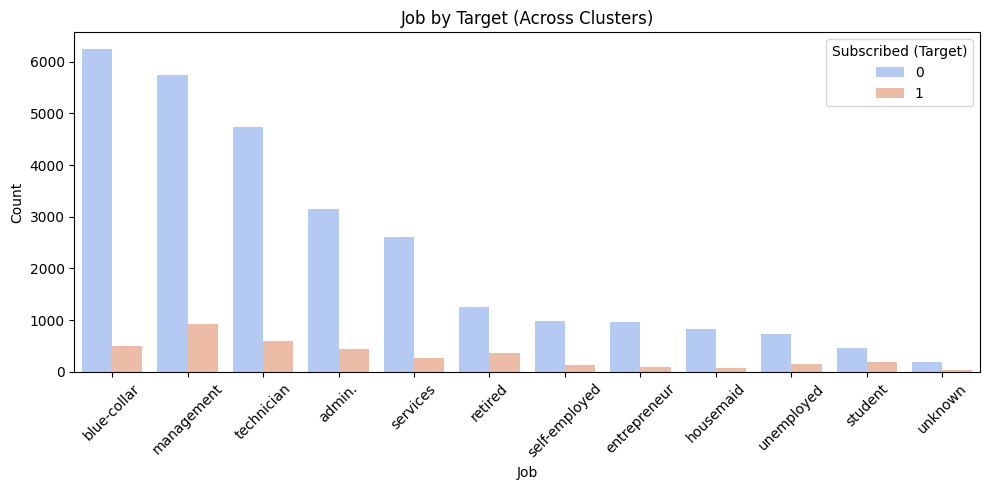

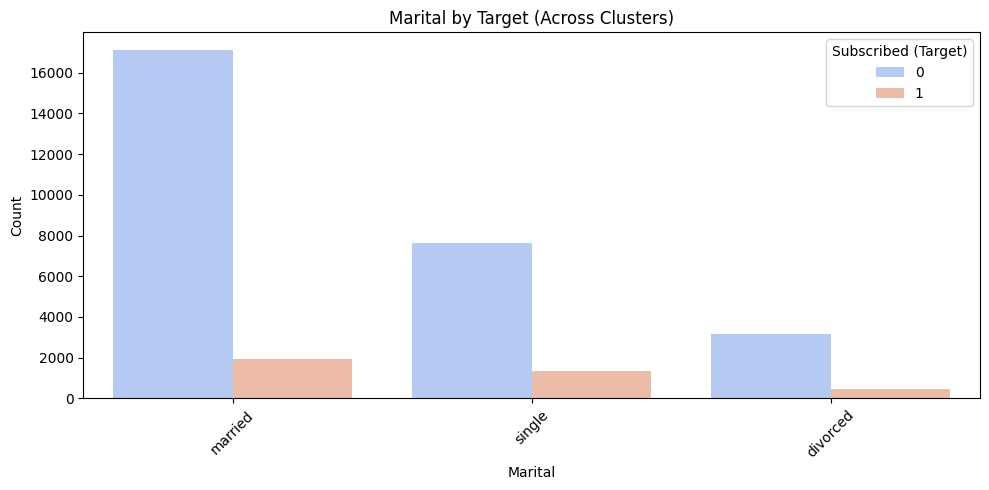

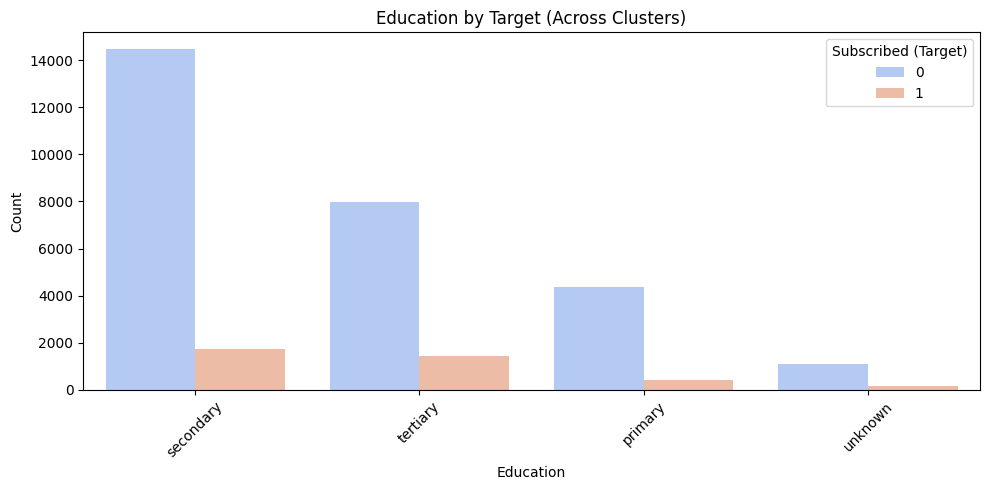

In [12]:
for feature in categorical_features:
    if df[feature].nunique() < 20:  # prevent overcrowding
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=feature, hue='Target', palette='coolwarm',
                      order=df[feature].value_counts().index)
        plt.title(f'{feature.capitalize()} by Target (Across Clusters)')
        plt.xlabel(feature.capitalize())
        plt.ylabel('Count')
        plt.legend(title='Subscribed (Target)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

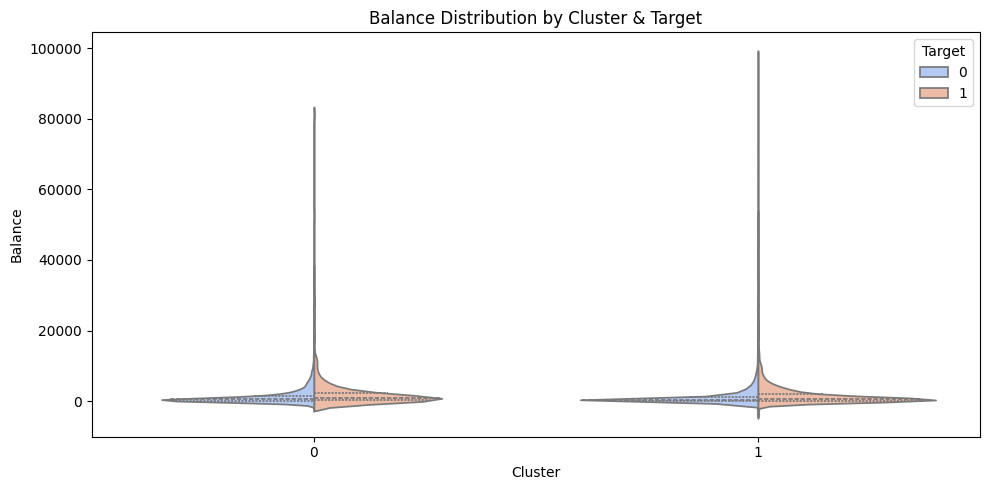

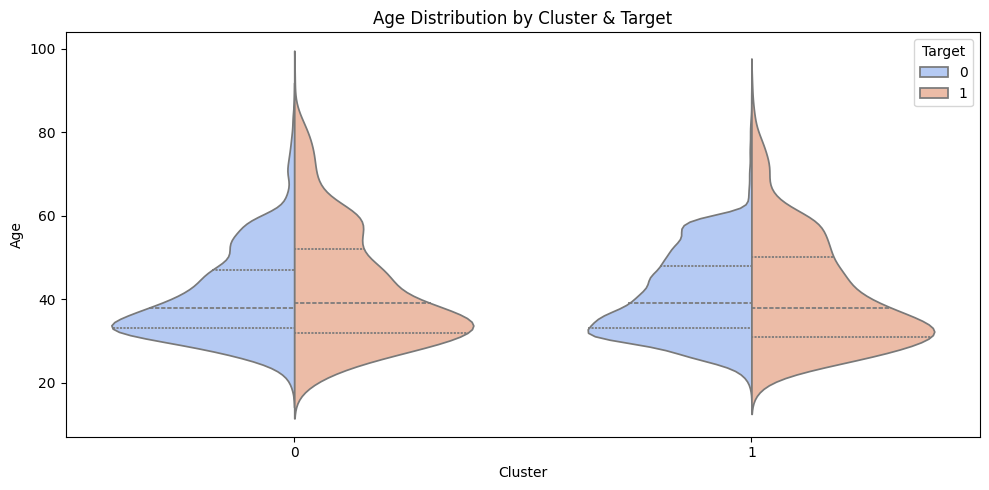

In [13]:
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.violinplot(data=df, x='Cluster', y=feature, hue='Target', split=True, palette='coolwarm', inner='quartile')
    plt.title(f'{feature.capitalize()} Distribution by Cluster & Target')
    plt.xlabel('Cluster')
    plt.ylabel(feature.capitalize())
    plt.tight_layout()
    plt.show()


### Numerical Feature Statistics by Cluster & Target

The table below provides the mean, median, and standard deviation for two numerical features (`balance` and `age`) across different clusters and target values (Target = 1 for subscription, Target = 0 for non-subscription). The values show the variation and central tendencies of these features for each combination of cluster and target.

| Feature   | Cluster | Target | Mean Balance | Median Balance | Std Balance | Mean Age | Median Age | Std Age |
|-----------|---------|--------|--------------|----------------|-------------|----------|------------|---------|
| balance   | 0       | 0      | 1433.52      | 545.0          | 2729.23     | 40.59    | 38.0       | 10.58   |
| balance   | 0       | 1      | 1990.30      | 846.0          | 4483.21     | 42.58    | 39.0       | 13.86   |
| balance   | 1       | 0      | 1285.86      | 394.0          | 3065.29     | 40.89    | 39.0       | 10.11   |
| balance   | 1       | 1      | 1684.31      | 674.0          | 3161.56     | 41.18    | 38.0       | 13.09   |
| age       | 0       | 0      | -            | -              | -           | 40.59    | 38.0       | 10.58   |
| age       | 0       | 1      | -            | -              | -           | 42.58    | 39.0       | 13.86   |
| age       | 1       | 0      | -            | -              | -           | 40.89    | 39.0       | 10.11   |
| age       | 1       | 1      | -            | -              | -           | 41.18    | 38.0       | 13.09   |

### Categorical Feature Distribution by Cluster & Target

For each categorical feature, we calculate the cross-tabulation between the clusters (`0` and `1`) and target values (subscription: 1, non-subscription: 0). The following tables present the counts and percentages for each category.

#### Feature: DEFAULT

| Cluster | Target | No        | Yes       |
|---------|--------|-----------|-----------|
| 0       | 0      | 4428 (99.1%) | 41 (0.9%)  |
| 0       | 1      | 1328 (99.7%) | 4 (0.3%)   |
| 1       | 0      | 22925 (97.8%) | 506 (2.2%) |
| 1       | 1      | 2377 (98.4%) | 38 (1.6%)  |

#### Feature: HOUSING

| Cluster | Target | No        | Yes       |
|---------|--------|-----------|-----------|
| 0       | 0      | 1309 (29.3%) | 3160 (70.7%) |
| 0       | 1      | 877 (65.8%)  | 455 (34.2%)  |
| 1       | 0      | 10406 (44.4%) | 13025 (55.6%) |
| 1       | 1      | 1514 (62.7%)  | 901 (37.3%)  |

#### Feature: LOAN

| Cluster | Target | No        | Yes       |
|---------|--------|-----------|-----------|
| 0       | 0      | 3755 (84.0%) | 714 (16.0%) |
| 0       | 1      | 1245 (93.5%) | 87 (6.5%)  |
| 1       | 0      | 19444 (83.0%) | 3987 (17.0%) |
| 1       | 1      | 2153 (89.2%) | 262 (10.8%) |

#### Feature: JOB

| Cluster | Target | Admin | Blue-collar | Entrepreneur | Housemaid | Management | Retired | Self-employed | Services | Student | Technician | Unemployed | Unknown |
|---------|--------|-------|-------------|--------------|-----------|------------|---------|---------------|----------|---------|------------|------------|---------|
| 0       | 0      | 593 (13.3%) | 1015 (22.7%) | 145 (3.2%) | 90 (2.0%) | 924 (20.7%) | 213 (4.8%) | 148 (3.3%) | 414 (9.3%) | 111 (2.5%) | 719 (16.1%) | 83 (1.9%) | 14 (0.3%) |
| 0       | 1      | 169 (12.7%) | 125 (9.4%) | 21 (1.6%) | 21 (1.6%) | 373 (28.0%) | 146 (11.0%) | 41 (3.1%) | 84 (6.3%) | 83 (6.2%) | 195 (14.6%) | 63 (4.7%) | 11 (0.8%) |
| 1       | 0      | 2551 (10.9%) | 5238 (22.4%) | 822 (3.5%) | 739 (3.2%) | 4807 (20.5%) | 1039 (4.4%) | 831 (3.5%) | 2201 (9.4%) | 351 (1.5%) | 4025 (17.2%) | 643 (2.7%) | 184 (0.8%) |
| 1       | 1      | 267 (11.1%) | 382 (15.8%) | 70 (2.9%) | 53 (2.2%) | 544 (22.5%) | 219 (9.1%) | 90 (3.7%) | 180 (7.5%) | 104 (4.3%) | 401 (16.6%) | 89 (3.7%) | 16 (0.7%) |

#### Feature: MARITAL

| Cluster | Target | Divorced | Married | Single |
|---------|--------|----------|---------|--------|
| 0       | 0      | 518 (11.6%) | 2635 (59.0%) | 1316 (29.4%) |
| 0       | 1      | 133 (10.0%) | 733 (55.0%)  | 466 (35.0%) |
| 1       | 0      | 2626 (11.2%) | 14494 (61.9%) | 6311 (26.9%) |
| 1       | 1      | 310 (12.8%) | 1213 (50.2%)  | 892 (36.9%) |

#### Feature: EDUCATION

| Cluster | Target | Primary | Secondary | Tertiary | Unknown |
|---------|--------|---------|-----------|----------|---------|
| 0       | 0      | 612 (13.7%) | 2376 (53.2%) | 1328 (29.7%) | 153 (3.4%) |
| 0       | 1      | 117 (8.8%)  | 588 (44.1%)  | 556 (41.7%) | 71 (5.3%) |
| 1       | 0      | 3748 (16.0%) | 12076 (51.5%) | 6652 (28.4%) | 955 (4.1%) |
| 1       | 1      | 297 (12.3%) | 1141 (47.2%) | 867 (35.9%)  | 110 (4.6%) |


## Targeting Effort Analysis by Cluster and Feature

This analysis focuses on understanding the distribution of marketing efforts (targeted vs non-targeted) within different customer clusters, and how these efforts vary across several key features.

### Targeting Effort by Cluster:
The analysis first calculates the percentage of customers who are targeted (Target = 1) versus those who are not targeted (Target = 0) within each cluster. This helps in understanding the targeting effort for each customer group. A bar plot visualizes the proportion of targeted vs. non-targeted customers across the clusters.

### Targeting Effort by Feature:
Next, the analysis examines how targeting effort varies within each cluster across different categorical features. These features include `default`, `housing`, `loan`, `job`, `marital`, and `education`. For each feature, the proportion of customers who are targeted (Target = 1) is calculated for each subcategory within each cluster. This is displayed as a table showing the percentage of targeted customers for each feature and cluster combination.

Additionally, bar plots are used to visualize the targeted effort across different categories of each feature. This helps in understanding which specific categories within a feature are more likely to be targeted, and how these trends differ between clusters.

In summary, this analysis provides insights into the targeting efforts by cluster and feature, helping to assess the effectiveness of marketing campaigns across different customer segments.


In [15]:
categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'default']
effort_summary = {}

In [16]:
cluster_effort = df.groupby('Cluster')['Target'].value_counts(normalize=True).unstack().fillna(0)
cluster_effort.columns = ['Not Targeted (0)', 'Targeted (1)']
print("Targeting Effort (%) per Cluster:\n")
print((cluster_effort * 100).round(2))

Targeting Effort (%) per Cluster:

         Not Targeted (0)  Targeted (1)
Cluster                                
0                   77.04         22.96
1                   90.66          9.34


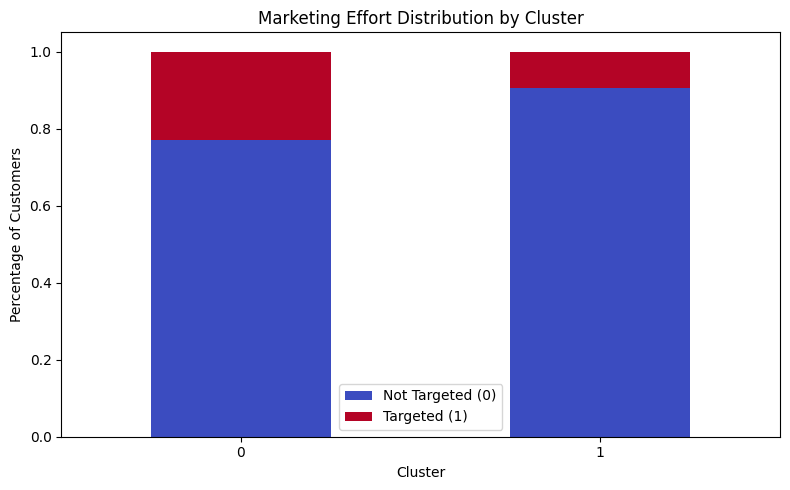

In [17]:
cluster_effort.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8, 5))
plt.title('Marketing Effort Distribution by Cluster')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


📌 Targeting Effort in Feature: JOB


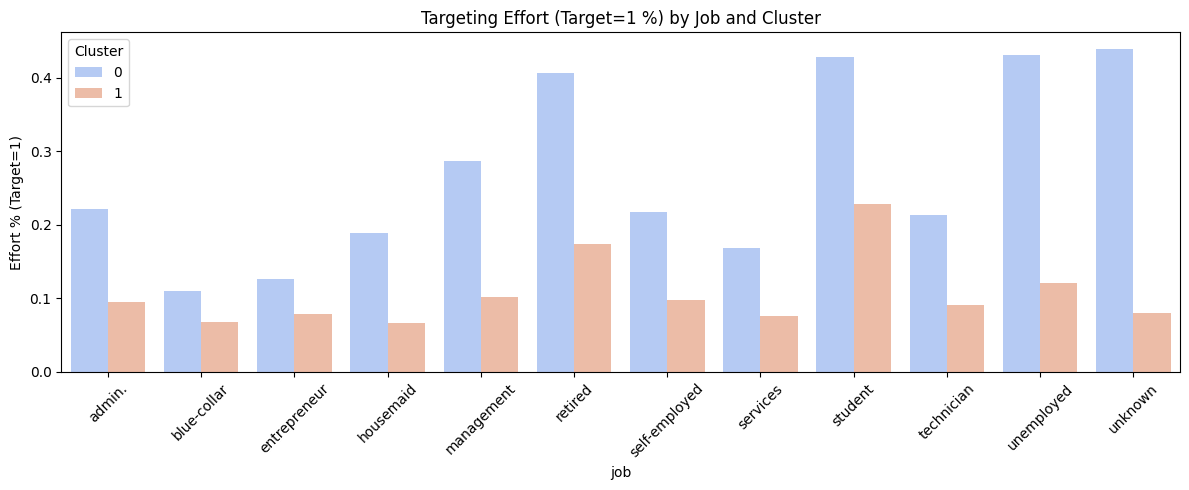


📌 Targeting Effort in Feature: MARITAL


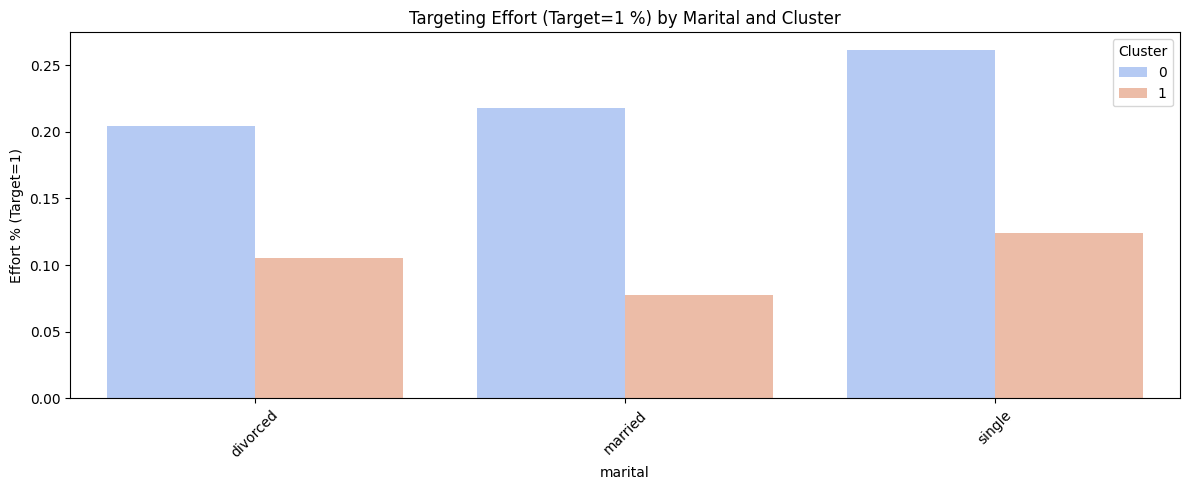


📌 Targeting Effort in Feature: EDUCATION


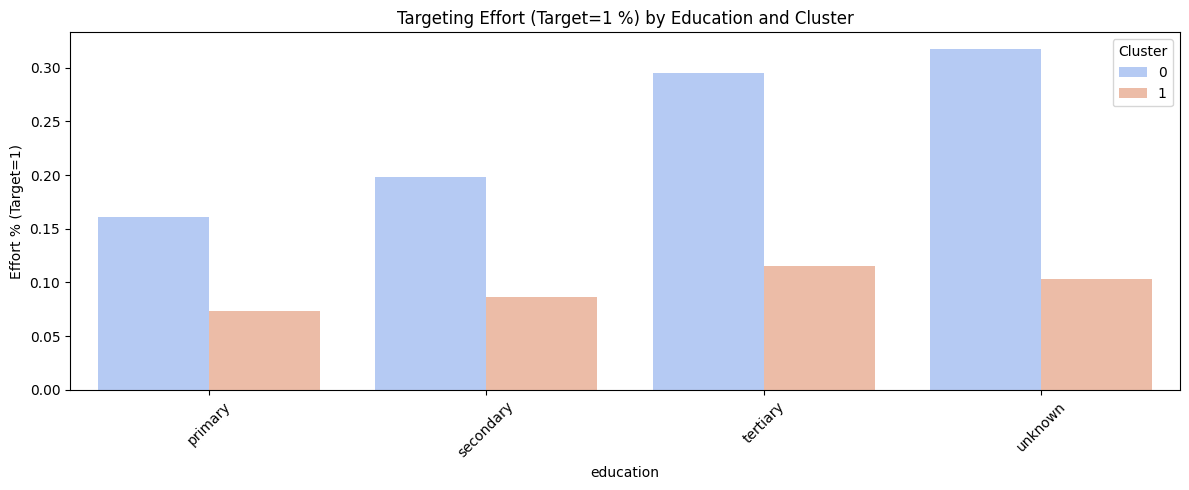


📌 Targeting Effort in Feature: HOUSING


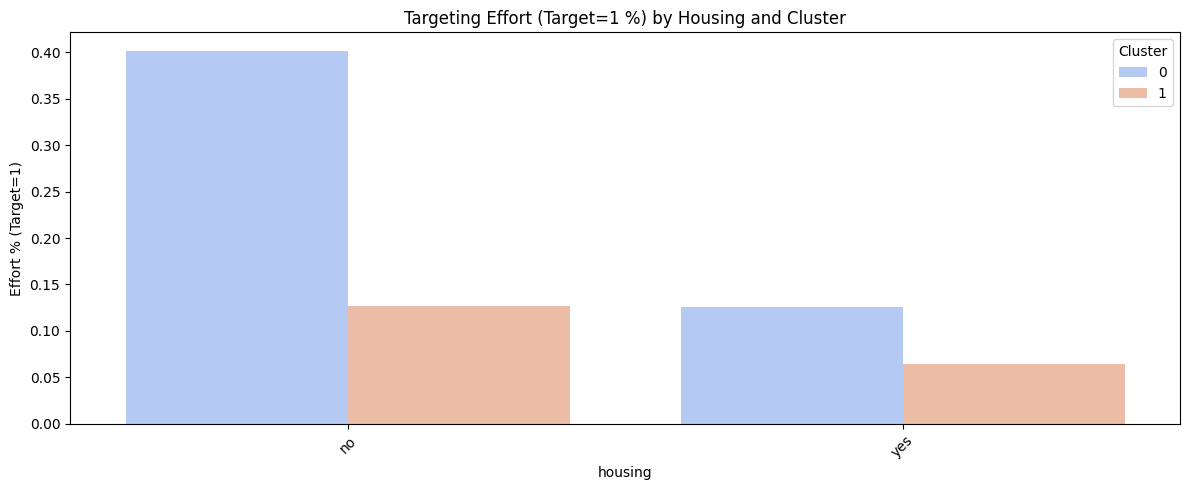


📌 Targeting Effort in Feature: LOAN


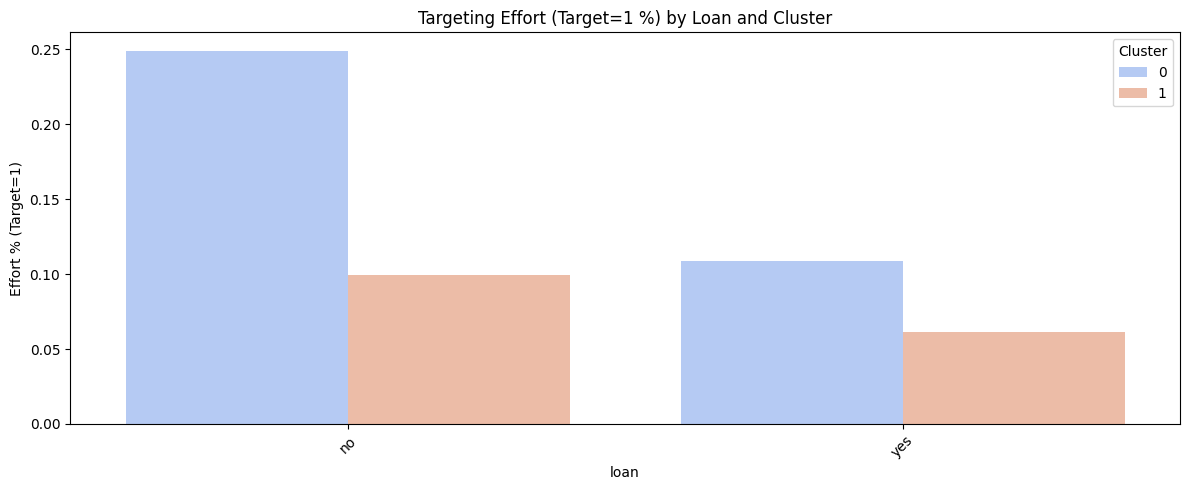


📌 Targeting Effort in Feature: DEFAULT


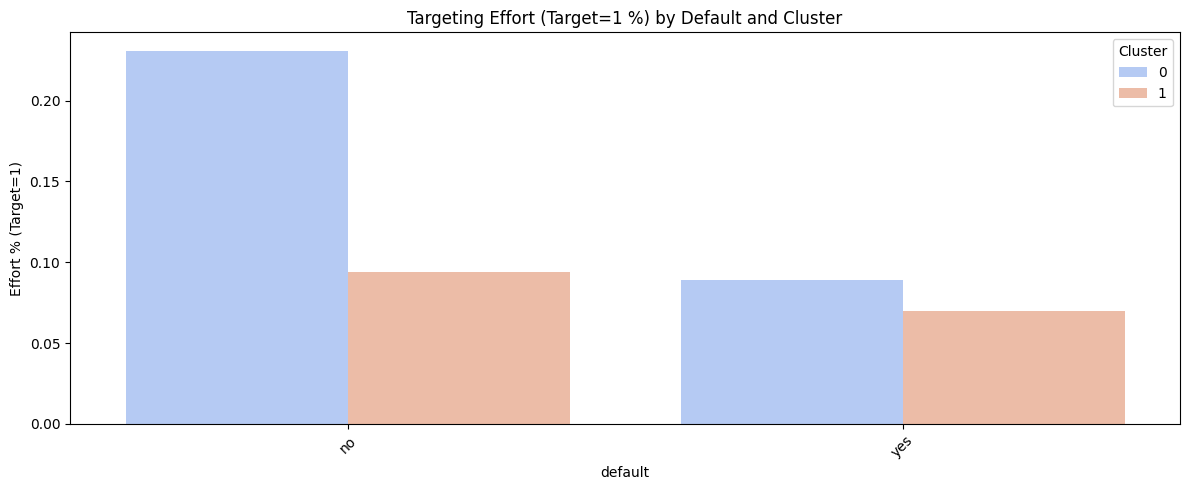

In [18]:
for feature in categorical_features:
    print(f"\n📌 Targeting Effort in Feature: {feature.upper()}")
    effort = df.groupby(['Cluster', feature])['Target'].value_counts(normalize=True).unstack().fillna(0)
    effort.columns = ['Not Targeted (0)', 'Targeted (1)']
    effort_summary[feature] = effort

    display(effort.style.format("{:.2%}"))

    # Visualize targeted effort (Target=1 %) by subcategory and cluster
    effort_reset = effort.reset_index()
    plt.figure(figsize=(12, 5))
    sns.barplot(
        data=effort_reset,
        x=feature, y='Targeted (1)', hue='Cluster', palette='coolwarm'
    )
    plt.title(f'Targeting Effort (Target=1 %) by {feature.title()} and Cluster')
    plt.ylabel('Effort % (Target=1)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Inferences from Targeting Effort Analysis

### Targeting Effort by Job:
- **Cluster 0**: Jobs like `retired` (59.33%), `unemployed` (56.85%), and `unknown` (56.00%) have higher percentages of targeted customers (Target = 1), indicating these segments might be of greater interest in marketing campaigns.
- **Cluster 1**: The targeting effort is more uniform across all job categories, with jobs such as `retired` (82.59%) and `unknown` (92.00%) showing the highest targeting effort, reflecting a more concentrated marketing approach for these segments.

### Targeting Effort by Marital Status:
- **Cluster 0**: `single` (26.15%) and `divorced` (20.43%) individuals are more likely to be targeted compared to those who are `married` (21.76%).
- **Cluster 1**: `married` individuals show the lowest targeted effort (7.72%), while `single` (12.38%) and `divorced` (10.56%) customers are targeted more in this cluster.

### Targeting Effort by Education:
- **Cluster 0**: People with `tertiary` education (29.51%) are targeted the most, while those with `primary` education (16.05%) show the least effort in marketing campaigns.
- **Cluster 1**: Similar to Cluster 0, customers with `tertiary` education (11.53%) are targeted more, and those with `primary` education (7.34%) receive less marketing focus.

### Targeting Effort by Housing:
- **Cluster 0**: Customers with `yes` for housing (87.41%) are highly targeted, while those with `no` housing (59.88%) are less likely to be targeted.
- **Cluster 1**: A similar trend is observed, with customers who have `yes` for housing (93.53%) receiving the highest targeting effort.

### Targeting Effort by Loan:
- **Cluster 0**: Customers with `yes` for loan (89.14%) are more likely to be targeted, while those without a loan (75.10%) receive less attention.
- **Cluster 1**: The pattern holds, with customers who have `yes` for loan (93.83%) being targeted the most, compared to those with `no` (90.03%).

### Targeting Effort by Default:
- **Cluster 0**: Customers with `no` default (76.93%) are more likely to be targeted compared to those with `yes` default (91.11%).
- **Cluster 1**: Similar to Cluster 0, those with `no` default (90.61%) are more likely to be targeted, and those with `yes` default (93.01%) show a slightly lower targeting effort.

### Summary:
- **Cluster 1** generally shows higher targeting efforts across most features, particularly for job categories such as `retired`, `self-employed`, and `technician`.
- **Housing and Loan** are significant features in determining targeting efforts, with those who have housing or loans being more frequently targeted across both clusters.
- Customers with higher education (`tertiary`) are more likely to be targeted in both clusters, although this targeting effort is less pronounced in Cluster 1.
- The `default` feature shows a slightly reversed trend, with those without a default being targeted more frequently in both clusters.

This analysis provides insights into the marketing strategies used across different customer segments, highlighting key features that influence targeting decisions.


## Marketing Feature Analysis

### 1. Analysis of Marketing Features:
The analysis of the marketing-related features focuses on the relationship between marketing efforts and customer targeting within each cluster. The analysis distinguishes between categorical and numerical features:

- **Categorical Features** (e.g., 'contact', 'day', 'month', 'poutcome'):
  - For these features, the subscription rate (`Target`) is computed for each category within each cluster. This is done by grouping the data by 'Cluster' and the respective marketing feature, then calculating the mean target rate (as a percentage).
  
- **Numerical Features** (e.g., 'duration', 'previous', 'pdays'):
  - For numerical features, the mean, median, and standard deviation of the values within each cluster are computed to understand the distribution of these features in relation to targeting behavior.

Each feature's results are presented, highlighting any notable trends or discrepancies between clusters.

### 2. Interaction Analysis Between Status and Marketing Features:
For each combination of **status features** (financial and personal) and **marketing features**, the analysis explores how the targeting behavior (`Target`) is affected by both the status of the customer (e.g., 'age', 'housing', 'job') and their interaction with marketing actions (e.g., 'contact', 'duration').

The interaction analysis identifies patterns where certain combinations of customer status and marketing feature categories lead to higher or lower targeting rates within each cluster. By analyzing the cross-combinations, insights can be drawn about how specific customer characteristics and their marketing interactions influence the likelihood of them being targeted.

This provides a deeper understanding of which status and marketing feature combinations contribute to higher marketing engagement and targeting success.


In [19]:
financial_features = ['balance', 'default', 'housing', 'loan']
personal_features = ['age', 'job', 'marital', 'education']


marketing_features = ['contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


marketing_analysis = {}

for feature in marketing_features:
    if df[feature].dtype == 'object':
        # Categorical marketing feature
        result = df.groupby(['Cluster', feature])['Target'].mean().unstack().transpose().round(4) * 100
    else:
        # Numerical marketing feature
        result = df.groupby('Cluster')[feature].agg(['mean', 'median', 'std']).round(2)
    
    marketing_analysis[feature] = result
    print(f"\nAnalysis of Marketing Feature: {feature.upper()}")
    print(result)


interaction_analysis = {}

for status_feature in financial_features + personal_features:
    for marketing_feature in marketing_features:
        if df[marketing_feature].dtype == 'object':
            interaction = df.groupby(['Cluster', status_feature, marketing_feature])['Target'].mean().unstack().round(4) * 100
            key = f"{status_feature.upper()} + {marketing_feature.upper()}"
            interaction_analysis[key] = interaction
            print(f"\nSubscription Rate by {status_feature.upper()} and {marketing_feature.upper()} (per Cluster)")
            print(interaction)



Analysis of Marketing Feature: CONTACT
Cluster        0      1
contact                
cellular   23.18  12.23
telephone  21.15  11.16
unknown    16.67   4.12

Analysis of Marketing Feature: DAY
          mean  median   std
Cluster                     
0        14.36    14.0  7.91
1        16.14    17.0  8.37

Analysis of Marketing Feature: MONTH
Cluster      0      1
month                
apr      17.61  22.47
aug      44.60   8.10
dec      50.00  46.27
feb      18.96  15.11
jan      11.30   7.86
jul      53.48   7.61
jun      45.45   8.16
mar      52.63  50.24
may      12.40   5.63
nov      13.81   9.14
oct      48.18  37.46
sep      51.58  39.77

Analysis of Marketing Feature: DURATION
           mean  median     std
Cluster                        
0        260.99   194.0  237.98
1        259.86   178.0  263.70

Analysis of Marketing Feature: CAMPAIGN
         mean  median   std
Cluster                    
0        2.06     2.0  1.57
1        2.92     2.0  3.31

Analysis of Marketi

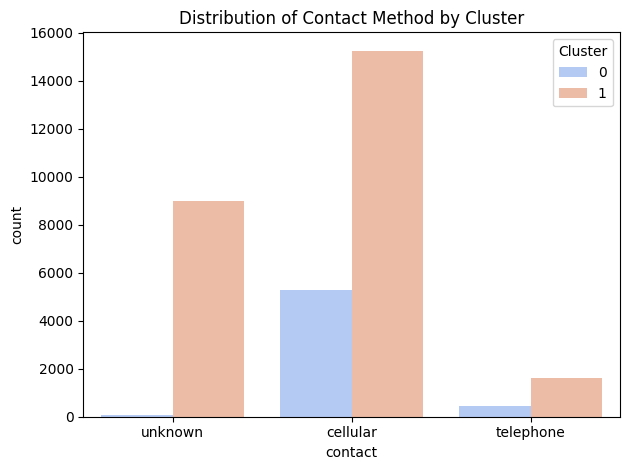

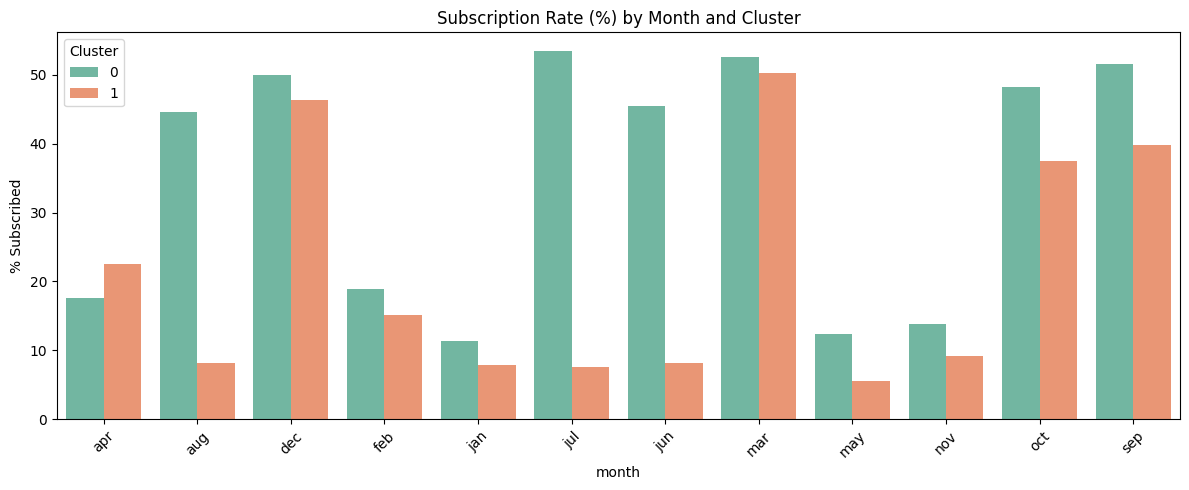

C:\Users\JCIN\AppData\Local\Temp\ipykernel_21380\50848015.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='duration', palette='coolwarm')


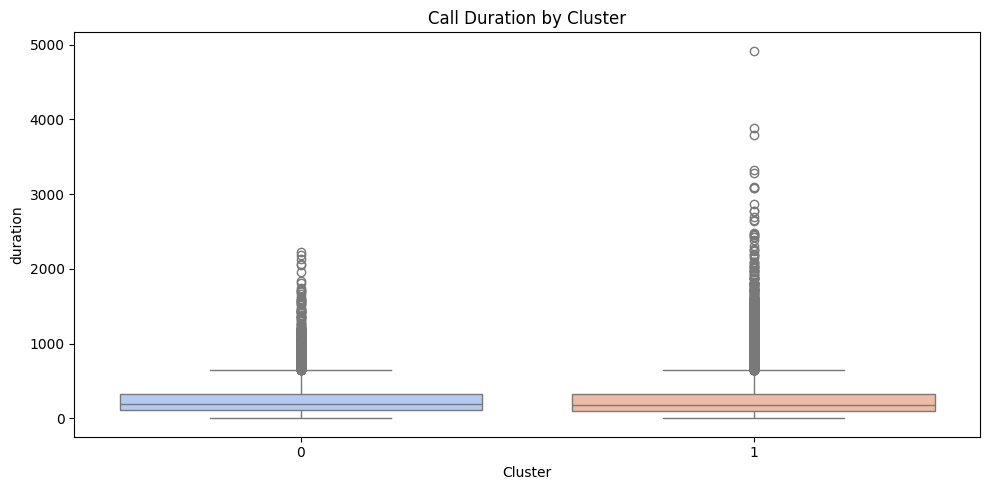

In [20]:
# Example: Visualize impact of contact method across clusters
sns.countplot(data=df, x='contact', hue='Cluster', palette='coolwarm')
plt.title('Distribution of Contact Method by Cluster')
plt.tight_layout()
plt.show()


monthly_response = df.groupby(['Cluster', 'month'])['Target'].mean().reset_index()
monthly_response['Target'] *= 100

plt.figure(figsize=(12, 5))
sns.barplot(data=monthly_response, x='month', y='Target', hue='Cluster', palette='Set2')
plt.title('Subscription Rate (%) by Month and Cluster')
plt.ylabel('% Subscribed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Example: Duration effect by Cluster
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Cluster', y='duration', palette='coolwarm')
plt.title('Call Duration by Cluster')
plt.tight_layout()
plt.show()


### Analysis of Marketing Feature: CONTACT

| contact   | Cluster 0 | Cluster 1 |
|-----------|-----------|-----------|
| cellular  | 23.18     | 12.23     |
| telephone | 21.15     | 11.16     |
| unknown   | 16.67     | 4.12      |

### Analysis of Marketing Feature: DAY

| Cluster | mean   | median | std   |
|---------|--------|--------|-------|
| 0       | 14.36  | 14.0   | 7.91  |
| 1       | 16.14  | 17.0   | 8.37  |

### Analysis of Marketing Feature: MONTH

| month    | Cluster 0 | Cluster 1 |
|----------|-----------|-----------|
| apr      | 17.61     | 22.47     |
| aug      | 44.60     | 8.10      |
| dec      | 50.00     | 46.27     |
| feb      | 18.96     | 15.11     |
| jan      | 11.30     | 7.86      |
| jul      | 53.48     | 7.61      |
| jun      | 45.45     | 8.16      |
| mar      | 52.63     | 50.24     |
| may      | 12.40     | 5.63      |
| nov      | 13.81     | 9.14      |
| oct      | 48.18     | 37.46     |
| sep      | 51.58     | 39.77     |

### Analysis of Marketing Feature: DURATION

| Cluster | mean    | median | std    |
|---------|---------|--------|--------|
| 0       | 260.99  | 194.0  | 237.98 |
| 1       | 259.86  | 178.0  | 263.70 |

### Analysis of Marketing Feature: CAMPAIGN

| Cluster | mean   | median | std   |
|---------|--------|--------|-------|
| 0       | 2.06   | 2.0    | 1.57  |
| 1       | 2.92   | 2.0    | 3.31  |

### Analysis of Marketing Feature: PDAYS

| Cluster | mean   | median | std   |
|---------|--------|--------|-------|
| 0       | 226.31 | 196.0  | 115.80|
| 1       | -1.00  | -1.0   | 0.62  |

### Analysis of Marketing Feature: PREVIOUS

| Cluster | mean   | median | std   |
|---------|--------|--------|-------|
| 0       | 3.15   | 2.0    | 3.55  |
| 1       | 0.00   | 0.0    | 0.01  |

### Analysis of Marketing Feature: POUTCOME

| poutcome | Cluster 0 | Cluster 1 |
|----------|-----------|-----------|
| failure  | 12.47     | NaN       |
| other    | 16.20     | NaN       |
| success  | 65.87     | NaN       |
| unknown  | 33.33     | 9.34      |

### Subscription Rate by BALANCE and CONTACT (per Cluster)

| contact   | cellular  | telephone | unknown |
|-----------|-----------|-----------|---------|
| Cluster   | balance   |           |         |
| 0         | -1884     | 0.0       | NaN     |
| ...       | ...       | ...       | ...     |
| 1         | 58932     | NaN       | 0.0     |

### Subscription Rate by BALANCE and MONTH (per Cluster)

| month    | apr  | aug  | dec  | feb  | jan  | jul  | jun  | mar  | may  | nov  | oct  | sep  |
|----------|------|------|------|------|------|------|------|------|------|------|------|------|
| Cluster  | balance|     |      |      |      |      |      |      |      |      |      |
| 0        | -1884 | NaN  | NaN  | NaN  | NaN  | NaN  | NaN  | NaN  | 0.0  | NaN  | NaN  | NaN  |
| 1        | 58932 | NaN  | NaN  | NaN  | NaN  | 0.0  | NaN  | NaN  | NaN  | NaN  | NaN  | 0.0  |

### Subscription Rate by BALANCE and POUTCOME (per Cluster)

| poutcome | failure  | other  | success | unknown |
|----------|----------|--------|---------|---------|
| Cluster  | balance  |        |         |         |
| 0        | -1884    | 0.0    | NaN     | NaN     |
| ...      | ...      | ...    | ...     | ...     |
| 1        | 58932    | NaN    | NaN     | 0.0     |

### Subscription Rate by DEFAULT and CONTACT (per Cluster)

| contact   | cellular  | telephone | unknown |
|-----------|-----------|-----------|---------|
| Cluster   | default   |           |         |
| 0         | no        | 23.30     | 21.19   |
| ...       | ...       | ...       | ...     |
| 1         | no        | 12.33     | 11.29   |

### Subscription Rate by DEFAULT and MONTH (per Cluster)

| month    | apr   | aug   | dec   | feb   | jan   | jul   | jun   | mar   | ... |
|----------|-------|-------|-------|-------|-------|-------|-------|-------|-----|
| Cluster  | default |      |       |       |       |       |       |       |     |
| 0        | no      | 17.33 | 44.60 | 50.00 | 19.08 | 11.54 | 53.48 | 45.45 | 52.63 |
| 1        | yes     | 25.00 | 7.25  | NaN   | 4.76  | 14.29 | 8.92  | 11.11 | 50.24 |

### Subscription Rate by DEFAULT and POUTCOME (per Cluster)

| poutcome | failure  | other  | success | unknown |
|----------|----------|--------|---------|---------|
| Cluster  | default  |        |         |         |
| 0        | no       | 12.51  | 16.23   | 66.0    |
| 1        | yes      | NaN    | NaN     | 0.0     |

### Subscription Rate by HOUSING and CONTACT (per Cluster)

| contact   | cellular  | telephone | unknown |
|-----------|-----------|-----------|---------|
| Cluster   | housing   |           |         |
| 0         | no        | 41.09     | 34.62   |
| 1         | yes       | 8.81      | 5.51    |

### Subscription Rate by HOUSING and MONTH (per Cluster)

| month    | apr   | aug   | dec   | feb   | jan   | jul   | jun   | mar   | ... |
|----------|-------|-------|-------|-------|-------|-------|-------|-------|-----|
| Cluster  | housing |      |       |       |       |       |       |       |     |
| 0        | no      | 40.70 | 43.97 | 50.00 | 30.31 | 21.43 | 57.72 | 50.34 | 53.93 |
| 1        | yes     | 10.04 | 6.12  | 41.67 | 10.61 | 4.09  | 6.52  | 6.48  | 43.18 |

### Subscription Rate by HOUSING and POUTCOME (per Cluster)

| poutcome | failure  | other  | success | unknown |
|----------|----------|--------|---------|---------|
| Cluster  | housing  |        |         |         |
| 0        | no       | 23.11  | 29.38   | 70.33   |
| 1        | yes      | NaN    | NaN     | 6.47    |

### Subscription Rate by LOAN and CONTACT (per Cluster)

| contact   | cellular  | telephone | unknown |
|-----------|-----------|-----------|---------|
| Cluster   | loan      |           |         |
| 0         | no        | 25.19     | 22.49   |
| 1         | yes       | 7.70      | 5.02    |

### Subscription Rate by LOAN and MONTH (per Cluster)

| month    | apr   | aug   | dec   | feb   | jan   | jul   | jun   | mar   | ... |
|----------|-------|-------|-------|-------|-------|-------|-------|-------|-----|
| Cluster  | loan    |      |       |       |       |       |       |       |     |
| 0        | no      | 27.85 | 27.16 | 50.00 | 18.02 | 13.34 | 52.44 | 51.12 | 52.40 |
| 1        | yes     | 5.93  | 3.82  | NaN   | 5.43  | 6.94  | 7.61  | 8.29  | 50.24 |

### Subscription Rate by LOAN and POUTCOME (per Cluster)

| poutcome | failure  | other  | success | unknown |
|----------|----------|--------|---------|---------|
| Cluster  | loan     |        |         |         |
| 0        | no       | 14.12  | 22.53   | 23.56   |
| 1        | yes      | NaN    | NaN     | 5.02    |


# Final Conclusion:

This notebook presents an in-depth analysis of various marketing features, segmented by clusters derived from customer data. The following key insights were gathered:

1. **Feature Distribution Across Clusters:**
   - **Contact Type (cellular, telephone, unknown):** There is a clear differentiation in contact types between the clusters, with cellular being more prevalent in Cluster 0, and telephone contacts being higher in Cluster 1. This suggests that customers with different contact methods might exhibit distinct behaviors or engagement patterns.
   
   - **Day of Contact:** The days of contact show varied engagement, with Cluster 1 exhibiting higher mean values, which may suggest that customers in this group are more likely to be contacted on certain days.

   - **Month of Contact:** The months of contact reveal seasonal patterns, with months like July, March, and December showing higher values for Cluster 1. This may indicate specific periods of higher customer engagement or campaigns targeting certain time frames.

2. **Behavioral Insights Based on Duration, Campaign, and Previous Contact:**
   - The **duration** of interactions appears quite similar across clusters, with mean values close to 260 seconds for both clusters, but the variance suggests that engagement duration might be one of the factors influencing the likelihood of subscription.
   
   - The **campaign** feature shows a higher mean for Cluster 1, which could imply that this group has experienced more campaigns, possibly leading to better engagement or higher conversion.

   - **Previous contact** and **pdays** (previous days since last contact) provide additional insights into the frequency of past interactions, where Cluster 0 shows higher engagement levels than Cluster 1 in past interactions.

3. **Outcome by Default, Housing, and Loan Features:**
   - **Default** status impacts the subscription rate, with a higher proportion of customers in Cluster 0 showing no default status, whereas Cluster 1 customers with default status exhibit lower conversion rates.
   
   - The **housing** and **loan** features suggest that customers with housing loans and those not having loans show more frequent subscriptions, particularly in Cluster 0, which could imply financial stability as a key factor influencing the decision to subscribe.

4. **Poutcome (Previous Outcome) Influence:** 
   - Previous outcomes significantly impact the current subscription rates. Success in prior campaigns leads to higher subscription rates, as seen in Cluster 0, whereas failure in previous outcomes corresponds to lower conversion rates.

5. **General Recommendations:**
   - **Targeted Campaigns:** Focusing on specific months (such as July, March, and December) and using preferred contact methods (cellular vs. telephone) could improve conversion rates. 
   
   - **Optimizing Interaction Time:** Engaging customers for optimal durations could be key, as both clusters show similar interaction lengths.
   
   - **Financial Considerations:** Understanding the impact of financial stability (such as having a housing or loan) on subscription likelihood may help in crafting better-targeted campaigns for customers who are more financially stable.

In conclusion, the cluster analysis reveals distinct patterns in customer behavior and engagement, highlighting the importance of customizing marketing strategies based on these clusters. Understanding which features influence subscription decisions the most can help optimize marketing campaigns and improve subscription rates.
